In [1]:
#Local
data_dir = 'C:/FSI/Googlecolab/dataset2'
train_dir = 'C:/FSI/Googlecolab/dataset2/train'
val_dir ='C:/FSI/Googlecolab/dataset2/val'
test_dir = 'C:/FSI/Googlecolab/dataset2/test'

In [1]:
#Local
data_dir = 'C:/FSI/Googlecolab/dataset2'
train_dir = 'C:/FSI/Googlecolab/dataset2/train'
val_dir ='C:/FSI/Googlecolab/dataset2/val'
test_dir = 'C:/FSI/Googlecolab/dataset2/test'

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import random
import tensorflow as tf

# Establecer semillas para NumPy y TensorFlow
seed1 = 42
np.random.seed(seed=seed1)
random.seed(seed1)
tf.random.set_seed(seed1)

image_size = 150
batch_size = 32
rescale_factor = 1./255

# Leer imágenes y etiquetas
def load_images_and_labels(directory):
    images = []
    labels = []
    class_folders = os.listdir(directory)
    class_folders.sort()

    for i, folder in enumerate(class_folders):
        class_path = os.path.join(directory, folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0  # Normalizar los valores de píxeles
                images.append(img)
                labels.append(i)

    return np.array(images), np.array(labels)

# Cargar imágenes de entrenamiento
train_images, train_labels = load_images_and_labels(train_dir)

# Cargar imágenes de validación
val_images, val_labels = load_images_and_labels(val_dir)

# Cargar imágenes de prueba
test_images, test_labels = load_images_and_labels(test_dir)



# Crear un generador de imágenes con data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Añadir 1000 imágenes con data augmentation al conjunto de entrenamiento
augmented_images = []
augmented_labels = []
num_augmented_images = 2000

for _ in range(num_augmented_images):
    index = random.randint(0, len(train_images) - 1)
    img = train_images[index]
    img = img.reshape((1,) + img.shape)
    label = train_labels[index]

    # Generar imagen aumentada
    augmented_img, _ = datagen.flow(img, [label], batch_size=1).next()

    augmented_images.append(augmented_img[0])
    augmented_labels.append(label)

# Convertir a numpy array
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenar imágenes aumentadas al conjunto de entrenamiento original
train_images = np.concatenate([train_images, augmented_images])
train_labels = np.concatenate([train_labels, augmented_labels])


# Dividir conjunto de entrenamiento en entrenamiento y validación
#train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=seed1)


In [3]:
from keras.optimizers.schedules.learning_rate_schedule import ExponentialDecay
from keras.regularizers import l2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalAccuracy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir el modelo
model = Sequential()

# Agregar capas convolucionales personalizadas
# Capas convolucionales
# Capas convolucionales
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3), name='block1_conv1'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Bloque 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Bloque 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Bloque 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Bloque 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))





# Agregar capas densas personalizadas
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))

# Compilar el modelo con un optimizador diferente y tasa de aprendizaje más baja

# Compilar el modelo con un learning rate schedule
initial_learning_rate = 0.000001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostrar la arquitectura del modelo
model.summary()

# Crear el objeto EarlyStopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Entrenar el modelo con Early Stopping y ReduceLROnPlateau
epochs = 200
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])


# Evaluar el modelo en datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Puedes usar history para visualizar la precisión y pérdida durante el entrenamiento
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)       2

KeyboardInterrupt: 

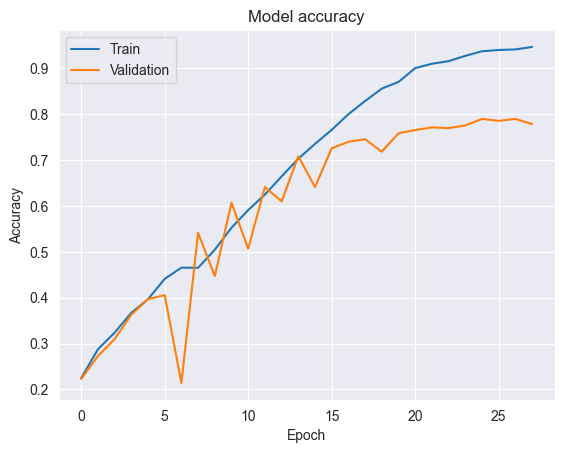

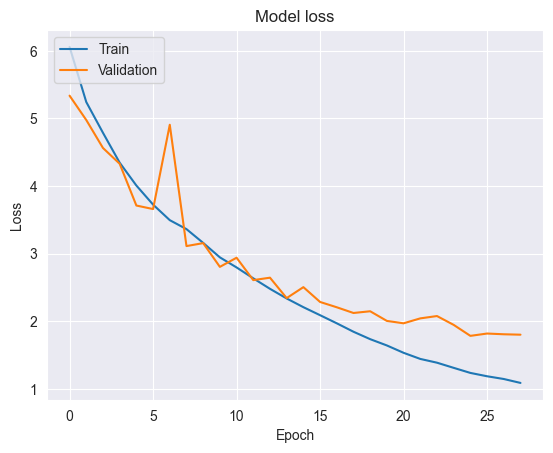

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

44/44 [==============================] - 4s 23ms/step
Matriz de Confusión:
[[103  24  35  17   2  15   4]
 [  8 132  19  11   0  27   3]
 [  5   1 188   2   4   0   0]
 [  9   6  27 110  38   2   8]
 [  3   3  22  23 140   6   3]
 [  1   0   3   0   0 188   8]
 [  1   0   0   2   0  13 184]]


<Axes: >

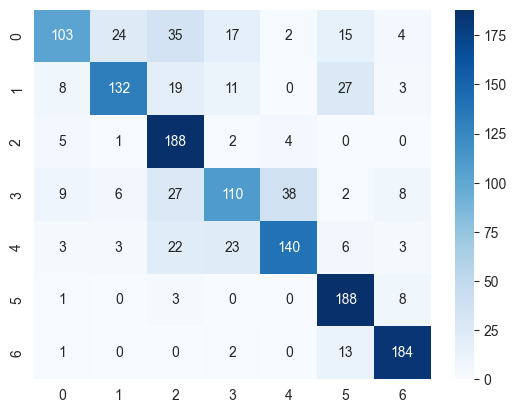

In [5]:
from sklearn.metrics import confusion_matrix

# Supongamos que ya has entrenado tu modelo y tienes imágenes de prueba y etiquetas de prueba
# Asegúrate de que el modelo está definido y entrenado antes de ejecutar esta parte del código

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Obtener las etiquetas predichas (índice de la clase con mayor probabilidad)
predicted_labels = np.argmax(predictions, axis=1)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualizar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")



In [9]:
import matplotlib.pyplot as plt

def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    #plt.ylim(0, 1)  # Establecer límites en el eje y de 0 a 1

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.ylim(0, 1)  # Establecer límites en el eje y de 0 a 1

    plt.tight_layout()
    plt.show()

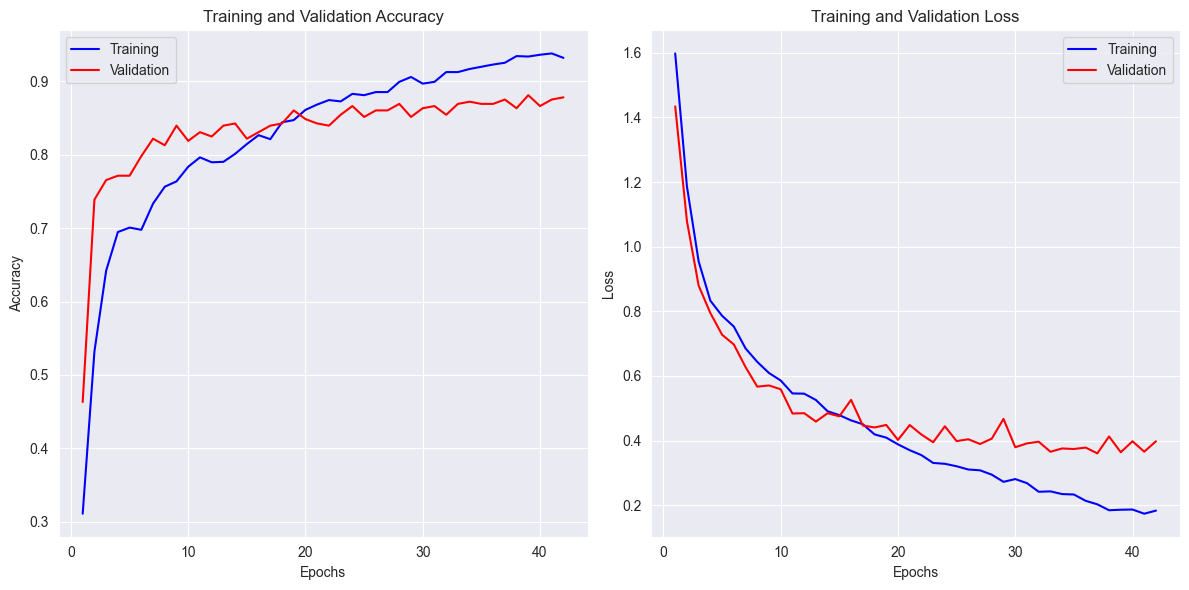

In [10]:
generatePlot(history)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Get predictions for the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate confusion matrix
confusion_mtx = confusion_matrix(true_labels, y_pred_classes)

print(train_generator.class_indices)
# Display classification report
print("Classification Report:")
print(classification_report(true_labels, y_pred_classes, target_names=test_generator.class_indices))

In [ ]:
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")

